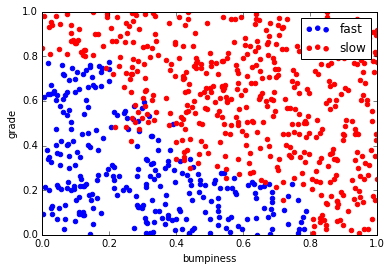

In [4]:
#!/usr/bin/python
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture
from time import time
from sklearn.metrics import accuracy_score

%matplotlib inline

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

#######################




In [2]:
## Data and features
print len(features_train)

750


In [3]:
################################################################################
## Classification Algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#
## Grid Search
from sklearn import grid_search
# from sklearn.metrics import make_scorer
# from sklearn.metrics import accuracy_score
parameters = {'n_estimators':[10, 15, 20, 25, 30, 40, 50, 80, 100, 120, 150], 'learning_rate':[0.3, 0.6, 1.0, 1.5, 2.0, 3.0, 4.0]}
for ms in [5, 10, 20, 30, 50, 60]:
    print "ms: ", ms
    dt = DecisionTreeClassifier(min_samples_split = ms) ## Custom decision tree weak estimator
    ada  = AdaBoostClassifier( base_estimator = dt )
    clf = grid_search.GridSearchCV(ada, parameters, cv = 10)
    
    ## Training and Prediction
    start = time()
    clf.fit(features_train,labels_train)
    print "Training time: ", round( time() - start, 3), "s"
    #
    start = time()
    pred = clf.predict(features_test)
    print "Prediction time: ", round( time() - start, 3), "s"
    
    ## Parameters
    print "Parameters: "
    print clf.best_params_
    print '....'
    print

    ## Best estimator
    print clf.best_estimator_
    print '....' 

    ## Accuracy
    print "Accuracy score: ", clf.best_score_
    print "---------------------"


Training time:  103.7 s
Prediction time:  0.002 s
Parameters: 
{'n_estimators': 15, 'learning_rate': 1.5}
....

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=60, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.5, n_estimators=15, random_state=None)
....
Accuracy score:  0.96
---------------------


Training time:  104.697 s
Prediction time:  0.002 s
Parameters: 
{'n_estimators': 15, 'learning_rate': 0.3}
....

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.3, n_estimators=15, random_state=None)
....
Accuracy score:  0.96
---------------------
ms:  60


Training time:  104.816 s
Prediction time:  0.002 s
Parameters: 
{'n_estimators': 10, 'learning_rate': 0.3}
....

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.3, n_estimators=10, random_state=None)
....
Accuracy score:  0.958666666667
---------------------
ms:  50


Training time:  102.562 s
Prediction time:  0.007 s
Parameters: 
{'n_estimators': 30, 'learning_rate': 2.0}
....

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=2.0, n_estimators=30, random_state=None)
....
Accuracy score:  0.96
---------------------
ms:  30


Training time:  91.299 s
Prediction time:  0.014 s
Parameters: 
{'n_estimators': 100, 'learning_rate': 0.6}
....

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.6, n_estimators=100, random_state=None)
....
Accuracy score:  0.957333333333
---------------------
ms:  20


Training time:  78.346 s
Prediction time:  0.003 s
Parameters: 
{'n_estimators': 150, 'learning_rate': 0.6}
....

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.6, n_estimators=150, random_state=None)
....
Accuracy score:  0.957333333333
---------------------
ms:  10


ms:  5


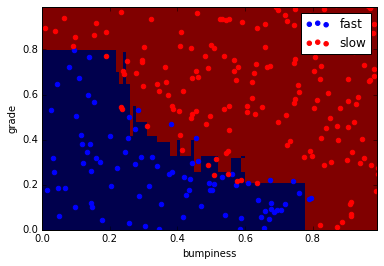

Training time:  0.081 s
Prediction time:  0.009 s
Accuracy:  0.912


In [19]:
## Confirm GridSearch's find, failed to produce the accuracy seen in the gridsearch
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#
## From above
clf = AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=2.0, n_estimators=30, random_state=None)

## Training and Prediction
start = time()
clf.fit(features_train,labels_train)
print "Training time: ", round( time() - start, 3), "s"
#
start = time()
pred = clf.predict(features_test)
print "Prediction time: ", round( time() - start, 3), "s"

## Accuracy
print "Accuracy: ", accuracy_score(labels_test, pred)
    

try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass


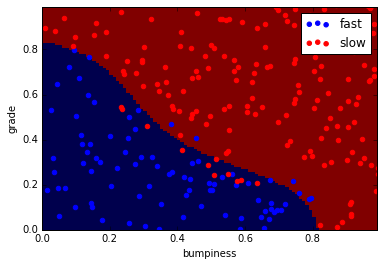

Training time:  0.548 s
Prediction time:  0.001 s
Accuracy:  0.924
what a fail


In [26]:
##Trying withh SVC
import numpy as np
from sklearn import grid_search
from sklearn.svm import SVC
from sklearn.metrics import make_scorer	

# scorer = make_scorer(accuracy_score)

# parameters = {'C':np.arange(50,100, 3), 'kernel': ['linear', 'poly', 'rbf'], 'degree': [2,3,4,5], 'class_weight':['balanced', ''], 
# 	     'decision_function_shape':['ovo','ovr'], 'coef0':np.arange(0.0, 20, .5) }
# svc = SVC()
# clf = grid_search.GridSearchCV(svc, parameters, scorer, n_jobs = 4, cv = 10)
## After running the above commented code (Training time:  10790.874 s)
clf = SVC(C=98, cache_size=200, class_weight='', coef0=5.5,
  decision_function_shape='ovo', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Training and Prediction
start = time()
clf.fit(features_train,labels_train)
print "Training time: ", round( time() - start, 3), "s"
#
#print clf.best_estimator_ #uncomment for grid search
start = time()
pred = clf.predict(features_test)
print "Prediction time: ", round( time() - start, 3), "s"

## Accuracy
print "Accuracy: ", accuracy_score(labels_test, pred)
    

try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass
print 'what a fail'

